In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from bartpy.bartpy.sklearnmodel import SklearnModel

enter bartpy/bartpy/initializers/sklearntreeinitializer.py SklearnTreeInitializer __init__
-exit bartpy/bartpy/initializers/sklearntreeinitializer.py SklearnTreeInitializer __init__
enter bartpy/bartpy/initializers/sklearntreeinitializer.py SklearnTreeInitializer __init__
-exit bartpy/bartpy/initializers/sklearntreeinitializer.py SklearnTreeInitializer __init__
enter bartpy/bartpy/samplers/scalar.py NormalScalarSampler __init__
-exit bartpy/bartpy/samplers/scalar.py NormalScalarSampler __init__
enter bartpy/bartpy/samplers/scalar.py UniformScalarSampler __init__
-exit bartpy/bartpy/samplers/scalar.py UniformScalarSampler __init__
enter /bartpy/bartpy/samplers/unconstrainedtree/treemutation.py UnconstrainedTreeMutationSampler get_tree_sampler
enter bartpy/bartpy/samplers/unconstrainedtree/proposer.py UniformMutationProposer __init__
enter bartpy/bartpy/samplers/scalar.py DiscreteSampler __init__
-exit bartpy/bartpy/samplers/scalar.py DiscreteSampler __init__
-exit bartpy/bartpy/samplers

Text(0.5, 1.0, 'X v y')

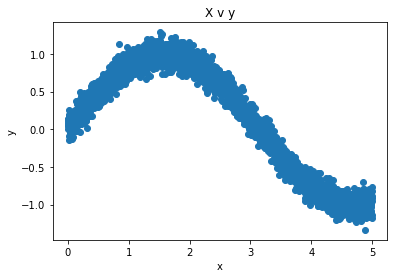

In [2]:
count = 3000
x = np.linspace(0, 5, count)
X = pd.DataFrame(x).sample(frac=1.0).values
y = np.random.normal(0, 0.1, size=count) + np.sin(X[:, 0])
plt.scatter(X[:, 0], y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("X v y")

In [9]:
kwargs = {
    "model": "causal_gaussian_mixture"
}
model = SklearnModel(
    n_samples=3,#1000, 
    n_burn=0,#200, 
    n_trees=1,#100, 
    n_chains=1,#4,
    n_jobs=1,#-1,
    store_in_sample_predictions=False,
    **kwargs
)

enter bartpy/bartpy/sklearnmodel.py SklearnModel __init__
Causal Gaussian Mixture using Transformed Outcomes...
enter bartpy/bartpy/samplers/leafnode.py LeafNodeSampler __init__
-exit bartpy/bartpy/samplers/leafnode.py LeafNodeSampler __init__
enter bartpy/bartpy/samplers/schedule.py SampleScheduleCGM __init__
-exit bartpy/bartpy/samplers/schedule.py SampleScheduleCGM __init__
enter bartpy/bartpy/samplers/modelsampler.py ModelSamplerCGM __init__
-exit bartpy/bartpy/samplers/modelsampler.py ModelSamplerCGM __init__
-exit bartpy/bartpy/sklearnmodel.py SklearnModel __init__


In [10]:
p = np.random.uniform(len(y))
W = np.random.binomial(n =1, p=.4, size = len(y))
model.fit_CGM(X, y, W, p)
#model.fit(X, y)

0it [00:00, ?it/s]
  0%|          | 0/3 [00:00<?, ?it/s]

enter bartpy/bartpy/sklearnmodel.py SklearnModel fit_CGM
enter bartpy/bartpy/sklearnmodel.py SklearnModel _construct_model_cgm
enter bartpy/bartpy/sklearnmodel.py SklearnModel _convert_covariates_to_data_cgm
enter bartpy/bartpy/data.py Data __init__
enter bartpy/bartpy/data.py Data mask
-exit bartpy/bartpy/data.py Data mask
enter bartpy/bartpy/data.py CovariateMatrix __init__
-exit bartpy/bartpy/data.py CovariateMatrix __init__
enter bartpy/bartpy/data.py Target __init__
enter bartpy/bartpy/data.py Target normalize_y
-exit bartpy/bartpy/data.py Target normalize_y
-exit bartpy/bartpy/data.py Target __init__
enter bartpy/bartpy/data.py TreatmentAssignment __init__
-exit bartpy/bartpy/data.py TreatmentAssignment __init__
enter bartpy/bartpy/data.py PropensityScore __init__
-exit bartpy/bartpy/data.py PropensityScore __init__
-exit bartpy/bartpy/data.py Data __init__
-exit bartpy/bartpy/sklearnmodel.py SklearnModel _convert_covariates_to_data_cgm
enter bartpy/bartpy/data.py Data y
-exit ba

 67%|██████▋   | 2/3 [00:00<00:00,  5.58it/s]


-exit bartpy/bartpy/node.py deep_copy_node
enter bartpy/bartpy/tree.py Tree __init__
-exit bartpy/bartpy/tree.py Tree __init__
-exit bartpy/bartpy/tree.py Tree deep_copy_tree
enter bartpy/bartpy/model.py ModelCGM __init__
**********************************************
in else trees is not None
in else trees is not None
self._trees_g= [<bartpy.bartpy.tree.Tree object at 0x7f9d68965a30>]
self._trees_h= [<bartpy.bartpy.tree.Tree object at 0x7f9d6893ecd0>]
type(self._trees_g)= <class 'list'>
type(self._trees_h)= <class 'list'>
-exit bartpy/bartpy/model.py ModelCGM __init__
-exit bartpy/bartpy/model.py deep_copy_model_cgm
iteration:  1
enter bartpy/bartpy/samplers/modelsampler.py ModelSamplerCGM step
enter bartpy/bartpy/samplers/schedule.py SampleScheduleCGM steps
enter bartpy/bartpy/model.py ModelCGM refreshed_trees_g
enter bartpy/bartpy/tree.py Tree predict_g
-exit bartpy/bartpy/tree.py Tree predict_g
enter bartpy/bartpy/data.py Data y
-exit bartpy/bartpy/data.py Data y
enter bartpy/bart

100%|██████████| 3/3 [00:00<00:00,  5.83it/s]

-exit bartpy/bartpy/model.py ModelCGM predict_g
self.predict_g()= [-0.08645814  0.34483554 -0.08645814 ...  0.09134256 -0.08645814
 -0.08645814]
enter bartpy/bartpy/data.py Data y
-exit bartpy/bartpy/data.py Data y
enter bartpy/bartpy/data.py Target values
-exit bartpy/bartpy/data.py Target values
enter bartpy/bartpy/model.py ModelCGM predict_g
enter bartpy/bartpy/model.py ModelCGM trees_g
-exit bartpy/bartpy/model.py ModelCGM trees_g
type(self.trees_g)= <class 'list'>
enter bartpy/bartpy/model.py ModelCGM trees_g
-exit bartpy/bartpy/model.py ModelCGM trees_g
enter bartpy/bartpy/tree.py Tree predict_g
-exit bartpy/bartpy/tree.py Tree predict_g
-exit bartpy/bartpy/model.py ModelCGM predict_g
-exit bartpy/bartpy/model.py ModelCGM residuals_g
-exit bartpy/bartpy/samplers/sigma.py SigmaSampler sample_cgm_g
enter bartpy/bartpy/sigma.py Sigma set_value
-exit bartpy/bartpy/sigma.py Sigma set_value
-exit bartpy/bartpy/samplers/sigma.py SigmaSampler step_cgm_g
enter bartpy/bartpy/trace.py Trace

SklearnModel(n_burn=0, n_chains=1, n_jobs=1, n_samples=3, n_trees=1)

In [5]:
pred = model.predict_cgm(X)
#score = model.score(X, y)

enter bartpy/bartpy/sklearnmodel.py SklearnModel predict
enter bartpy/bartpy/sklearnmodel.py SklearnModel _out_of_sample_predict_cgm
enter bartpy/bartpy/data.py Data y
-exit bartpy/bartpy/data.py Data y
enter bartpy/bartpy/model.py ModelCGM predict_g
enter bartpy/bartpy/model.py ModelCGM trees_g
-exit bartpy/bartpy/model.py ModelCGM trees_g
type(self.trees_g)= <class 'list'>
enter bartpy/bartpy/model.py ModelCGM _out_of_sample_predict_g
enter bartpy/bartpy/model.py ModelCGM trees_g
-exit bartpy/bartpy/model.py ModelCGM trees_g
enter bartpy/bartpy/tree.py Tree
enter bartpy/bartpy/tree.py Tree _out_of_sample_predict
enter bartpy/bartpy/tree.py Tree leaf_nodes
-exit bartpy/bartpy/tree.py Tree leaf_nodes
enter bartpy/bartpy/node.py LeafNode predict
-exit bartpy/bartpy/node.py LeafNode predict
enter bartpy/bartpy/node.py LeafNode current_value
-exit bartpy/bartpy/node.py LeafNode current_value
enter bartpy/bartpy/node.py TreeNode split
-exit bartpy/bartpy/node.py TreeNode split
enter bartpy

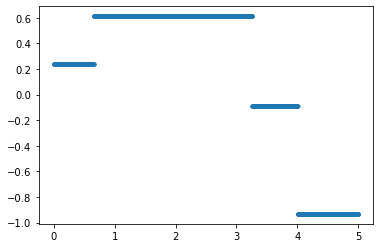

In [6]:
plt.plot(X, pred, '.')

Will probably need to add methods for h(x) and g(x)

In [ ]:

enter bartpy/bartpy/model.py ModelCGM refreshed_trees_g
    enter bartpy/bartpy/model.py ModelCGM predict_g
        enter bartpy/bartpy/model.py ModelCGM trees_g
        -exit bartpy/bartpy/model.py ModelCGM trees_g
        enter bartpy/bartpy/model.py ModelCGM trees_g
        -exit bartpy/bartpy/model.py ModelCGM trees_g
        enter bartpy/bartpy/tree.py Tree predict_g
            enter bartpy/bartpy/tree.py Tree leaf_nodes
            -exit bartpy/bartpy/tree.py Tree leaf_nodes
            enter bartpy/bartpy/tree.py Tree nodes
            -exit bartpy/bartpy/tree.py Tree nodes
            enter bartpy/bartpy/node.py TreeNode data
            -exit bartpy/bartpy/node.py TreeNode data
            enter bartpy/bartpy/split.py Split data
            -exit bartpy/bartpy/split.py Split data
            enter bartpy/bartpy/data.py Data X
            -exit bartpy/bartpy/data.py Data X
            enter bartpy/bartpy/data.py CovariateMatrix n_obsv
            -exit bartpy/bartpy/data.py CovariateMatrix n_obsv
            enter bartpy/bartpy/node.py LeafNode predict
            -exit bartpy/bartpy/node.py LeafNode predict
            enter bartpy/bartpy/node.py LeafNode current_value
            -exit bartpy/bartpy/node.py LeafNode current_value
            enter bartpy/bartpy/node.py TreeNode split
            -exit bartpy/bartpy/node.py TreeNode split
            enter bartpy/bartpy/split.py Split condition
                enter bartpy/bartpy/data.py Data mask
                -exit bartpy/bartpy/data.py Data mask
            -exit bartpy/bartpy/split.py Split condition
        -exit bartpy/bartpy/tree.py Tree predict_g
    -exit bartpy/bartpy/model.py ModelCGM predict_g

enter bartpy/bartpy/tree.py Tree predict_g
-exit bartpy/bartpy/tree.py Tree predict_g
enter bartpy/bartpy/data.py Data y
-exit bartpy/bartpy/data.py Data y
enter bartpy/bartpy/data.py Target values
-exit bartpy/bartpy/data.py Target values
enter bartpy/bartpy/tree.py Tree update_y
enter bartpy/bartpy/tree.py Tree nodes
-exit bartpy/bartpy/tree.py Tree nodes
enter bartpy/bartpy/node.py TreeNode update_y
enter bartpy/bartpy/node.py TreeNode data
-exit bartpy/bartpy/node.py TreeNode data
enter bartpy/bartpy/split.py Split data
-exit bartpy/bartpy/split.py Split data
enter bartpy/bartpy/data.py Data update_y
enter bartpy/bartpy/data.py Target update_y
-exit bartpy/bartpy/data.py Target update_y
-exit bartpy/bartpy/data.py Data update_y
enter bartpy/bartpy/node.py TreeNode left_child
-exit bartpy/bartpy/node.py TreeNode left_child
-exit bartpy/bartpy/node.py TreeNode update_y
-exit bartpy/bartpy/tree.py Tree update_y
enter /bartpy/bartpy/samplers/unconstrainedtree/treemutation.py UnconstrainedTreeMutationSampler step_cgm_g
enter /bartpy/bartpy/samplers/unconstrainedtree/treemutation.py UnconstrainedTreeMutationSampler sample_cgm_g
enter bartpy/bartpy/samplers/unconstrainedtree/proposer.py UniformMutationProposer propose
enter bartpy/bartpy/samplers/scalar.py DiscreteSampler sample
-exit bartpy/bartpy/samplers/scalar.py DiscreteSampler sample
enter bartpy/bartpy/samplers/unconstrainedtree/proposer.py uniformly_sample_grow_mutation
enter bartpy/bartpy/samplers/unconstrainedtree/proposer.py random_splittable_leaf_node
enter bartpy/bartpy/tree.py Tree splittable_leaf_nodes
enter bartpy/bartpy/tree.py Tree leaf_nodes
-exit bartpy/bartpy/tree.py Tree leaf_nodes
enter bartpy/bartpy/node.py LeafNode is_splittable
enter bartpy/bartpy/node.py TreeNode data
-exit bartpy/bartpy/node.py TreeNode data
enter bartpy/bartpy/split.py Split data
-exit bartpy/bartpy/split.py Split data
enter bartpy/bartpy/data.py Data X
-exit bartpy/bartpy/data.py Data X
enter bartpy/bartpy/data.py CovariateMatrix is_at_least_one_splittable_variable
enter bartpy/bartpy/data.py CovariateMatrix splittable_variables
enter bartpy/bartpy/data.py CovariateMatrix get_column
enter bartpy/bartpy/data.py CovariateMatrix values
-exit bartpy/bartpy/data.py CovariateMatrix values
enter bartpy/bartpy/data.py CovariateMatrix mask
-exit bartpy/bartpy/data.py CovariateMatrix mask
-exit bartpy/bartpy/data.py CovariateMatrix get_column
enter bartpy/bartpy/data.py is_not_constant
-exit bartpy/bartpy/data.py is_not_constant
-exit bartpy/bartpy/data.py CovariateMatrix splittable_variables
-exit bartpy/bartpy/data.py CovariateMatrix is_at_least_one_splittable_variable
-exit bartpy/bartpy/node.py LeafNode is_splittable
-exit bartpy/bartpy/tree.py Tree splittable_leaf_nodes
-exit bartpy/bartpy/samplers/unconstrainedtree/proposer.py random_splittable_leaf_node
enter bartpy/bartpy/samplers/unconstrainedtree/proposer.py sample_split_node
enter bartpy/bartpy/samplers/unconstrainedtree/proposer.py sample_split_condition
enter bartpy/bartpy/node.py TreeNode split
-exit bartpy/bartpy/node.py TreeNode split
enter bartpy/bartpy/split.py Split data
-exit bartpy/bartpy/split.py Split data
enter bartpy/bartpy/data.py Data X
-exit bartpy/bartpy/data.py Data X
enter bartpy/bartpy/data.py CovariateMatrix splittable_variables
-exit bartpy/bartpy/data.py CovariateMatrix splittable_variables
enter bartpy/bartpy/node.py TreeNode data
-exit bartpy/bartpy/node.py TreeNode data
enter bartpy/bartpy/split.py Split data
-exit bartpy/bartpy/split.py Split data
enter bartpy/bartpy/data.py Data X
-exit bartpy/bartpy/data.py Data X
enter bartpy/bartpy/data.py CovariateMatrix random_splittable_value
enter bartpy/bartpy/data.py CovariateMatrix splittable_variables
-exit bartpy/bartpy/data.py CovariateMatrix splittable_variables
enter bartpy/bartpy/data.py CovariateMatrix max_value_of_column
enter bartpy/bartpy/data.py CovariateMatrix get_column
-exit bartpy/bartpy/data.py CovariateMatrix get_column
-exit bartpy/bartpy/data.py CovariateMatrix max_value_of_column
enter bartpy/bartpy/data.py CovariateMatrix get_column
-exit bartpy/bartpy/data.py CovariateMatrix get_column
-exit bartpy/bartpy/data.py CovariateMatrix random_splittable_value
enter bartpy/bartpy/splitcondition.py SplitCondition __init__
-exit bartpy/bartpy/splitcondition.py SplitCondition __init__
enter bartpy/bartpy/splitcondition.py SplitCondition __init__
-exit bartpy/bartpy/splitcondition.py SplitCondition __init__
-exit bartpy/bartpy/samplers/unconstrainedtree/proposer.py sample_split_condition
enter bartpy/bartpy/node.py split_node
enter bartpy/bartpy/node.py TreeNode split
-exit bartpy/bartpy/node.py TreeNode split
enter bartpy/bartpy/split.py Split __add__
enter bartpy/bartpy/data.py Data __add__
enter bartpy/bartpy/data.py Data X
-exit bartpy/bartpy/data.py Data X
enter bartpy/bartpy/data.py CovariateMatrix update_mask
enter bartpy/bartpy/data.py CovariateMatrix values
-exit bartpy/bartpy/data.py CovariateMatrix values
enter bartpy/bartpy/data.py CovariateMatrix mask
-exit bartpy/bartpy/data.py CovariateMatrix mask
-exit bartpy/bartpy/data.py CovariateMatrix update_mask
enter bartpy/bartpy/data.py Data X
-exit bartpy/bartpy/data.py Data X
enter bartpy/bartpy/data.py CovariateMatrix values
-exit bartpy/bartpy/data.py CovariateMatrix values
enter bartpy/bartpy/data.py Data y
-exit bartpy/bartpy/data.py Data y
enter bartpy/bartpy/data.py Target values
-exit bartpy/bartpy/data.py Target values
enter bartpy/bartpy/data.py Data __init__
enter bartpy/bartpy/data.py Data mask
-exit bartpy/bartpy/data.py Data mask
enter bartpy/bartpy/data.py CovariateMatrix __init__
-exit bartpy/bartpy/data.py CovariateMatrix __init__
enter bartpy/bartpy/data.py Target __init__
-exit bartpy/bartpy/data.py Target __init__
enter bartpy/bartpy/data.py TreatmentAssignment __init__
-exit bartpy/bartpy/data.py TreatmentAssignment __init__
enter bartpy/bartpy/data.py PropensityScore __init__
-exit bartpy/bartpy/data.py PropensityScore __init__
-exit bartpy/bartpy/data.py Data __init__
-exit bartpy/bartpy/data.py Data __add__
enter bartpy/bartpy/splitcondition.py CombinedCondition __add__
enter bartpy/bartpy/splitcondition.py CombinedCondition __init__
enter bartpy/bartpy/splitcondition.py CombinedVariableCondition __init__
-exit bartpy/bartpy/splitcondition.py CombinedVariableCondition __init__
enter bartpy/bartpy/splitcondition.py CombinedVariableCondition add_condition
enter bartpy/bartpy/splitcondition.py CombinedVariableCondition __init__
-exit bartpy/bartpy/splitcondition.py CombinedVariableCondition __init__
-exit bartpy/bartpy/splitcondition.py CombinedVariableCondition add_condition
-exit bartpy/bartpy/splitcondition.py CombinedCondition __init__
-exit bartpy/bartpy/splitcondition.py CombinedCondition __add__
enter bartpy/bartpy/split.py Split __init__
-exit bartpy/bartpy/split.py Split __init__
-exit bartpy/bartpy/split.py Split __add__
enter bartpy/bartpy/node.py TreeNode data
-exit bartpy/bartpy/node.py TreeNode data
enter bartpy/bartpy/split.py Split data
-exit bartpy/bartpy/split.py Split data
enter bartpy/bartpy/data.py Data X
-exit bartpy/bartpy/data.py Data X
enter bartpy/bartpy/data.py CovariateMatrix n_obsv
-exit bartpy/bartpy/data.py CovariateMatrix n_obsv
enter bartpy/bartpy/split.py Split data
-exit bartpy/bartpy/split.py Split data
enter bartpy/bartpy/data.py Data X
-exit bartpy/bartpy/data.py Data X
enter bartpy/bartpy/data.py CovariateMatrix n_obsv
-exit bartpy/bartpy/data.py CovariateMatrix n_obsv
enter bartpy/bartpy/node.py TreeNode data
-exit bartpy/bartpy/node.py TreeNode data
enter bartpy/bartpy/split.py Split data
-exit bartpy/bartpy/split.py Split data
enter bartpy/bartpy/data.py Data y
-exit bartpy/bartpy/data.py Data y
enter bartpy/bartpy/data.py Target summed_y
-exit bartpy/bartpy/data.py Target summed_y
enter bartpy/bartpy/split.py Split data
-exit bartpy/bartpy/split.py Split data
enter bartpy/bartpy/data.py Data y
-exit bartpy/bartpy/data.py Data y
enter bartpy/bartpy/data.py Target summed_y
-exit bartpy/bartpy/data.py Target summed_y
enter bartpy/bartpy/node.py TreeNode split
-exit bartpy/bartpy/node.py TreeNode split
enter bartpy/bartpy/split.py Split __add__
enter bartpy/bartpy/data.py Data __add__
enter bartpy/bartpy/data.py Data X
-exit bartpy/bartpy/data.py Data X
enter bartpy/bartpy/data.py CovariateMatrix update_mask
enter bartpy/bartpy/data.py CovariateMatrix values
-exit bartpy/bartpy/data.py CovariateMatrix values
enter bartpy/bartpy/data.py CovariateMatrix mask
-exit bartpy/bartpy/data.py CovariateMatrix mask
-exit bartpy/bartpy/data.py CovariateMatrix update_mask
enter bartpy/bartpy/data.py Data X
-exit bartpy/bartpy/data.py Data X
enter bartpy/bartpy/data.py CovariateMatrix values
-exit bartpy/bartpy/data.py CovariateMatrix values
enter bartpy/bartpy/data.py Data y
-exit bartpy/bartpy/data.py Data y
enter bartpy/bartpy/data.py Target values
-exit bartpy/bartpy/data.py Target values
enter bartpy/bartpy/data.py Data __init__
enter bartpy/bartpy/data.py CovariateMatrix __init__
-exit bartpy/bartpy/data.py CovariateMatrix __init__
enter bartpy/bartpy/data.py Target __init__
-exit bartpy/bartpy/data.py Target __init__
enter bartpy/bartpy/data.py TreatmentAssignment __init__
-exit bartpy/bartpy/data.py TreatmentAssignment __init__
enter bartpy/bartpy/data.py PropensityScore __init__
-exit bartpy/bartpy/data.py PropensityScore __init__
-exit bartpy/bartpy/data.py Data __init__
-exit bartpy/bartpy/data.py Data __add__
enter bartpy/bartpy/splitcondition.py CombinedCondition __add__
enter bartpy/bartpy/splitcondition.py CombinedCondition __init__
enter bartpy/bartpy/splitcondition.py CombinedVariableCondition __init__
-exit bartpy/bartpy/splitcondition.py CombinedVariableCondition __init__
enter bartpy/bartpy/splitcondition.py CombinedVariableCondition add_condition
enter bartpy/bartpy/splitcondition.py CombinedVariableCondition __init__
-exit bartpy/bartpy/splitcondition.py CombinedVariableCondition __init__
-exit bartpy/bartpy/splitcondition.py CombinedVariableCondition add_condition
-exit bartpy/bartpy/splitcondition.py CombinedCondition __init__
-exit bartpy/bartpy/splitcondition.py CombinedCondition __add__
enter bartpy/bartpy/split.py Split __init__
-exit bartpy/bartpy/split.py Split __init__
-exit bartpy/bartpy/split.py Split __add__
enter bartpy/bartpy/node.py TreeNode split
-exit bartpy/bartpy/node.py TreeNode split
enter bartpy/bartpy/node.py LeafNode __init__
enter bartpy/bartpy/node.py TreeNode __init__
-exit bartpy/bartpy/node.py TreeNode __init__
-exit bartpy/bartpy/node.py LeafNode __init__
enter bartpy/bartpy/node.py LeafNode __init__
enter bartpy/bartpy/node.py TreeNode __init__
-exit bartpy/bartpy/node.py TreeNode __init__
-exit bartpy/bartpy/node.py LeafNode __init__
enter bartpy/bartpy/node.py DecisionNode__init__
enter bartpy/bartpy/node.py TreeNode __init__
-exit bartpy/bartpy/node.py TreeNode __init__
-exit bartpy/bartpy/node.py DecisionNode__init__
-exit bartpy/bartpy/node.py split_node
-exit bartpy/bartpy/samplers/unconstrainedtree/proposer.py sample_split_node
enter bartpy/bartpy/mutation.py GrowMutation __init__
enter bartpy/bartpy/mutation.py TreeMutation __init__
-exit bartpy/bartpy/mutation.py TreeMutation __init__
-exit bartpy/bartpy/mutation.py GrowMutation __init__
-exit bartpy/bartpy/samplers/unconstrainedtree/proposer.py uniformly_sample_grow_mutation
-exit bartpy/bartpy/samplers/unconstrainedtree/proposer.py UniformMutationProposer propose
enter bartpy/bartpy/samplers/treemutation.py TreeMutationLikihoodRatio log_probability_ratio_cgm_g
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py UniformTreeMutationLikihoodRatio log_transition_ratio
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py UniformTreeMutationLikihoodRatio log_grow_transition_ratio
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py n_prunable_decision_nodes
enter bartpy/bartpy/tree.py Tree prunable_decision_nodes
enter bartpy/bartpy/tree.py Tree decision_nodes
-exit bartpy/bartpy/tree.py Tree decision_nodes
-exit bartpy/bartpy/tree.py Tree prunable_decision_nodes
-exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py n_prunable_decision_nodes
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_split_within_tree
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py n_splittable_leaf_nodes
enter bartpy/bartpy/tree.py Tree splittable_leaf_nodes
enter bartpy/bartpy/tree.py Tree leaf_nodes
-exit bartpy/bartpy/tree.py Tree leaf_nodes
enter bartpy/bartpy/node.py LeafNode is_splittable
enter bartpy/bartpy/node.py TreeNode data
-exit bartpy/bartpy/node.py TreeNode data
enter bartpy/bartpy/split.py Split data
-exit bartpy/bartpy/split.py Split data
enter bartpy/bartpy/data.py Data X
-exit bartpy/bartpy/data.py Data X
enter bartpy/bartpy/data.py CovariateMatrix is_at_least_one_splittable_variable
-exit bartpy/bartpy/data.py CovariateMatrix is_at_least_one_splittable_variable
-exit bartpy/bartpy/node.py LeafNode is_splittable
-exit bartpy/bartpy/tree.py Tree splittable_leaf_nodes
-exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py n_splittable_leaf_nodes
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_split_within_node
enter bartpy/bartpy/node.py TreeNode data
-exit bartpy/bartpy/node.py TreeNode data
enter bartpy/bartpy/split.py Split data
-exit bartpy/bartpy/split.py Split data
enter bartpy/bartpy/data.py Data X
-exit bartpy/bartpy/data.py Data X
enter bartpy/bartpy/data.py CovariateMatrixn_splittable_variables
enter bartpy/bartpy/data.py CovariateMatrix splittable_variables
-exit bartpy/bartpy/data.py CovariateMatrix splittable_variables
-exit bartpy/bartpy/data.py CovariateMatrixn_splittable_variables
enter bartpy/bartpy/node.py DecisionNode
enter bartpy/bartpy/node.py TreeNode left_child
-exit bartpy/bartpy/node.py TreeNode left_child
enter bartpy/bartpy/node.py TreeNode split
-exit bartpy/bartpy/node.py TreeNode split
enter bartpy/bartpy/split.py Split most_recent_split_condition
enter bartpy/bartpy/splitcondition.py CombinedCondition most_recent_split_condition
-exit bartpy/bartpy/splitcondition.py CombinedCondition most_recent_split_condition
-exit bartpy/bartpy/split.py Split most_recent_split_condition
-exit bartpy/bartpy/node.py DecisionNode
enter bartpy/bartpy/node.py DecisionNode
enter bartpy/bartpy/node.py TreeNode left_child
-exit bartpy/bartpy/node.py TreeNode left_child
enter bartpy/bartpy/node.py TreeNode split
-exit bartpy/bartpy/node.py TreeNode split
enter bartpy/bartpy/split.py Split most_recent_split_condition
enter bartpy/bartpy/splitcondition.py CombinedCondition most_recent_split_condition
-exit bartpy/bartpy/splitcondition.py CombinedCondition most_recent_split_condition
-exit bartpy/bartpy/split.py Split most_recent_split_condition
-exit bartpy/bartpy/node.py DecisionNode
enter bartpy/bartpy/node.py TreeNode data
-exit bartpy/bartpy/node.py TreeNode data
enter bartpy/bartpy/split.py Split data
-exit bartpy/bartpy/split.py Split data
enter bartpy/bartpy/data.py Data X
-exit bartpy/bartpy/data.py Data X
enter bartpy/bartpy/data.py CovariateMatrix proportion_of_value_in_variable
enter bartpy/bartpy/data.py CovariateMatrix is_column_unique
enter bartpy/bartpy/data.py CovariateMatrix get_column
-exit bartpy/bartpy/data.py CovariateMatrix get_column
-exit bartpy/bartpy/data.py CovariateMatrix is_column_unique
enter bartpy/bartpy/data.py CovariateMatrix n_obsv
-exit bartpy/bartpy/data.py CovariateMatrix n_obsv
-exit bartpy/bartpy/data.py CovariateMatrix proportion_of_value_in_variable
-exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_split_within_node
-exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_split_within_tree
-exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py UniformTreeMutationLikihoodRatio log_grow_transition_ratio
-exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py UniformTreeMutationLikihoodRatio log_transition_ratio
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py UniformTreeMutationLikihoodRatio log_likihood_ratio_cgm_g
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py UniformTreeMutationLikihoodRatio log_likihood_ratio_grow_cgm_g
enter bartpy/bartpy/node.py TreeNode left_child
-exit bartpy/bartpy/node.py TreeNode left_child
enter bartpy/bartpy/node.py TreeNode right_child
-exit bartpy/bartpy/node.py TreeNode right_child
enter bartpy/bartpy/model.py ModelCGM sigma_g
-exit bartpy/bartpy/model.py ModelCGM sigma_g
enter bartpy/bartpy/model.py ModelCGM sigma_g_m
-exit bartpy/bartpy/model.py ModelCGM sigma_g_m
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_grow_ratio_cgm_g
enter bartpy/bartpy/sigma.py Sigma current_value
-exit bartpy/bartpy/sigma.py Sigma current_value
enter bartpy/bartpy/node.py TreeNode data
-exit bartpy/bartpy/node.py TreeNode data
enter bartpy/bartpy/split.py Split data
-exit bartpy/bartpy/split.py Split data
enter bartpy/bartpy/data.py Data X
-exit bartpy/bartpy/data.py Data X
enter bartpy/bartpy/data.py CovariateMatrix n_obsv
-exit bartpy/bartpy/data.py CovariateMatrix n_obsv
enter bartpy/bartpy/node.py TreeNode data
-exit bartpy/bartpy/node.py TreeNode data
enter bartpy/bartpy/split.py Split data
-exit bartpy/bartpy/split.py Split data
enter bartpy/bartpy/data.py Data X
-exit bartpy/bartpy/data.py Data X
enter bartpy/bartpy/data.py CovariateMatrix n_obsv
-exit bartpy/bartpy/data.py CovariateMatrix n_obsv
enter bartpy/bartpy/node.py TreeNode data
-exit bartpy/bartpy/node.py TreeNode data
enter bartpy/bartpy/split.py Split data
-exit bartpy/bartpy/split.py Split data
enter bartpy/bartpy/data.py Data X
-exit bartpy/bartpy/data.py Data X
enter bartpy/bartpy/data.py CovariateMatrix n_obsv
-exit bartpy/bartpy/data.py CovariateMatrix n_obsv
enter bartpy/bartpy/node.py TreeNode data
-exit bartpy/bartpy/node.py TreeNode data
enter bartpy/bartpy/split.py Split data
-exit bartpy/bartpy/split.py Split data
enter bartpy/bartpy/data.py Data y
-exit bartpy/bartpy/data.py Data y
enter bartpy/bartpy/data.py Target summed_y
-exit bartpy/bartpy/data.py Target summed_y
enter bartpy/bartpy/node.py TreeNode data
-exit bartpy/bartpy/node.py TreeNode data
enter bartpy/bartpy/split.py Split data
-exit bartpy/bartpy/split.py Split data
enter bartpy/bartpy/data.py Data y
-exit bartpy/bartpy/data.py Data y
enter bartpy/bartpy/data.py Target summed_y
-exit bartpy/bartpy/data.py Target summed_y
enter bartpy/bartpy/node.py TreeNode data
-exit bartpy/bartpy/node.py TreeNode data
enter bartpy/bartpy/split.py Split data
-exit bartpy/bartpy/split.py Split data
enter bartpy/bartpy/data.py Data y
-exit bartpy/bartpy/data.py Data y
enter bartpy/bartpy/data.py Target summed_y
-exit bartpy/bartpy/data.py Target summed_y
-exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_grow_ratio_cgm_g
-exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py UniformTreeMutationLikihoodRatio log_likihood_ratio_grow_cgm_g
-exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py UniformTreeMutationLikihoodRatio log_likihood_ratio_cgm_g
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py UniformTreeMutationLikihoodRatio log_tree_ratio_cgm
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py UniformTreeMutationLikihoodRatio log_tree_ratio_grow_cgm
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_node_not_split
-exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_node_not_split
enter bartpy/bartpy/node.py TreeNode left_child
-exit bartpy/bartpy/node.py TreeNode left_child
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_node_not_split
-exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_node_not_split
enter bartpy/bartpy/node.py TreeNode right_child
-exit bartpy/bartpy/node.py TreeNode right_child
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_node_not_split
-exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_node_not_split
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_node_split
-exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_node_split
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_split_within_tree
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py n_splittable_leaf_nodes
enter bartpy/bartpy/tree.py Tree splittable_leaf_nodes
enter bartpy/bartpy/tree.py Tree leaf_nodes
-exit bartpy/bartpy/tree.py Tree leaf_nodes
enter bartpy/bartpy/node.py LeafNode is_splittable
enter bartpy/bartpy/node.py TreeNode data
-exit bartpy/bartpy/node.py TreeNode data
enter bartpy/bartpy/split.py Split data
-exit bartpy/bartpy/split.py Split data
enter bartpy/bartpy/data.py Data X
-exit bartpy/bartpy/data.py Data X
enter bartpy/bartpy/data.py CovariateMatrix is_at_least_one_splittable_variable
-exit bartpy/bartpy/data.py CovariateMatrix is_at_least_one_splittable_variable
-exit bartpy/bartpy/node.py LeafNode is_splittable
-exit bartpy/bartpy/tree.py Tree splittable_leaf_nodes
-exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py n_splittable_leaf_nodes
enter bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_split_within_node
enter bartpy/bartpy/node.py TreeNode data
-exit bartpy/bartpy/node.py TreeNode data
enter bartpy/bartpy/split.py Split data
-exit bartpy/bartpy/split.py Split data
enter bartpy/bartpy/data.py Data X
-exit bartpy/bartpy/data.py Data X
enter bartpy/bartpy/data.py CovariateMatrixn_splittable_variables
enter bartpy/bartpy/data.py CovariateMatrix splittable_variables
-exit bartpy/bartpy/data.py CovariateMatrix splittable_variables
-exit bartpy/bartpy/data.py CovariateMatrixn_splittable_variables
enter bartpy/bartpy/node.py DecisionNode
enter bartpy/bartpy/node.py TreeNode left_child
-exit bartpy/bartpy/node.py TreeNode left_child
enter bartpy/bartpy/node.py TreeNode split
-exit bartpy/bartpy/node.py TreeNode split
enter bartpy/bartpy/split.py Split most_recent_split_condition
enter bartpy/bartpy/splitcondition.py CombinedCondition most_recent_split_condition
-exit bartpy/bartpy/splitcondition.py CombinedCondition most_recent_split_condition
-exit bartpy/bartpy/split.py Split most_recent_split_condition
-exit bartpy/bartpy/node.py DecisionNode
enter bartpy/bartpy/node.py DecisionNode
enter bartpy/bartpy/node.py TreeNode left_child
-exit bartpy/bartpy/node.py TreeNode left_child
enter bartpy/bartpy/node.py TreeNode split
-exit bartpy/bartpy/node.py TreeNode split
enter bartpy/bartpy/split.py Split most_recent_split_condition
enter bartpy/bartpy/splitcondition.py CombinedCondition most_recent_split_condition
-exit bartpy/bartpy/splitcondition.py CombinedCondition most_recent_split_condition
-exit bartpy/bartpy/split.py Split most_recent_split_condition
-exit bartpy/bartpy/node.py DecisionNode
enter bartpy/bartpy/node.py TreeNode data
-exit bartpy/bartpy/node.py TreeNode data
enter bartpy/bartpy/split.py Split data
-exit bartpy/bartpy/split.py Split data
enter bartpy/bartpy/data.py Data X
-exit bartpy/bartpy/data.py Data X
enter bartpy/bartpy/data.py CovariateMatrix proportion_of_value_in_variable
enter bartpy/bartpy/data.py CovariateMatrix is_column_unique
-exit bartpy/bartpy/data.py CovariateMatrix is_column_unique
enter bartpy/bartpy/data.py CovariateMatrix n_obsv
-exit bartpy/bartpy/data.py CovariateMatrix n_obsv
-exit bartpy/bartpy/data.py CovariateMatrix proportion_of_value_in_variable
-exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_split_within_node
-exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py log_probability_split_within_tree
-exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py UniformTreeMutationLikihoodRatio log_tree_ratio_grow_cgm
exit bartpy/bartpy/samplers/unconstrainedtree/likihoodratio.py UniformTreeMutationLikihoodRatio log_tree_ratio_cgm
-exit bartpy/bartpy/samplers/treemutation.py TreeMutationLikihoodRatio log_probability_ratio_cgm_g
enter bartpy/bartpy/samplers/scalar.py UniformScalarSampler sample
-exit bartpy/bartpy/samplers/scalar.py UniformScalarSampler sample
-exit /bartpy/bartpy/samplers/unconstrainedtree/treemutation.py UnconstrainedTreeMutationSampler sample_cgm_g
enter bartpy/bartpy/tree.py Tree mutate
enter bartpy/bartpy/tree.py Tree remove_node
-exit bartpy/bartpy/tree.py Tree remove_node
enter bartpy/bartpy/node.py TreeNode left_child
-exit bartpy/bartpy/node.py TreeNode left_child
enter bartpy/bartpy/tree.py Tree add_node
-exit bartpy/bartpy/tree.py Tree add_node
enter bartpy/bartpy/node.py TreeNode right_child
-exit bartpy/bartpy/node.py TreeNode right_child
enter bartpy/bartpy/tree.py Tree add_node
-exit bartpy/bartpy/tree.py Tree add_node
enter bartpy/bartpy/tree.py Tree add_node
-exit bartpy/bartpy/tree.py Tree add_node
enter bartpy/bartpy/tree.py Tree nodes
-exit bartpy/bartpy/tree.py Tree nodes
enter bartpy/bartpy/node.py TreeNode right_child
-exit bartpy/bartpy/node.py TreeNode right_child
enter bartpy/bartpy/node.py TreeNode left_child
-exit bartpy/bartpy/node.py TreeNode left_child
enter bartpy/bartpy/node.py TreeNode right_child
-exit bartpy/bartpy/node.py TreeNode right_child
enter bartpy/bartpy/node.py TreeNode left_child
-exit bartpy/bartpy/node.py TreeNode left_child
enter bartpy/bartpy/node.py TreeNode right_child
-exit bartpy/bartpy/node.py TreeNode right_child
enter bartpy/bartpy/node.py TreeNode left_child
-exit bartpy/bartpy/node.py TreeNode left_child
-exit bartpy/bartpy/tree.py Tree mutate
-exit /bartpy/bartpy/samplers/unconstrainedtree/treemutation.py UnconstrainedTreeMutationSampler step_cgm_g
enter bartpy/bartpy/trace.py TraceLoggerCGM __getitem__
-exit bartpy/bartpy/trace.py TraceLoggerCGM __getitem__
enter bartpy/bartpy/tree.py Tree leaf_nodes
-exit bartpy/bartpy/tree.py Tree leaf_nodes
enter bartpy/bartpy/samplers/leafnode.py LeafNodeSampler step_cgm_g
enter bartpy/bartpy/samplers/leafnode.py LeafNodeSampler sample_cgm_g
enter bartpy/bartpy/model.py ModelCGM sigma_g_m
-exit bartpy/bartpy/model.py ModelCGM sigma_g_m
enter bartpy/bartpy/node.py TreeNode data
-exit bartpy/bartpy/node.py TreeNode data
enter bartpy/bartpy/split.py Split data
-exit bartpy/bartpy/split.py Split data
enter bartpy/bartpy/data.py Data X
-exit bartpy/bartpy/data.py Data X
enter bartpy/bartpy/data.py CovariateMatrix n_obsv
-exit bartpy/bartpy/data.py CovariateMatrix n_obsv
enter bartpy/bartpy/model.py ModelCGM sigma_g
-exit bartpy/bartpy/model.py ModelCGM sigma_g
enter bartpy/bartpy/sigma.py Sigma current_value
-exit bartpy/bartpy/sigma.py Sigma current_value
enter bartpy/bartpy/node.py TreeNode data
-exit bartpy/bartpy/node.py TreeNode data
enter bartpy/bartpy/split.py Split data
-exit bartpy/bartpy/split.py Split data
enter bartpy/bartpy/data.py Data y
-exit bartpy/bartpy/data.py Data y
enter bartpy/bartpy/data.py Target summed_y
-exit bartpy/bartpy/data.py Target summed_y
enter bartpy/bartpy/samplers/scalar.py NormalScalarSampler sample
-exit bartpy/bartpy/samplers/scalar.py NormalScalarSampler sample
-exit bartpy/bartpy/samplers/leafnode.py LeafNodeSampler sample_cgm_g
enter bartpy/bartpy/node.py LeafNode set_value
-exit bartpy/bartpy/node.py LeafNode set_value
-exit bartpy/bartpy/samplers/leafnode.py LeafNodeSampler step_cgm_g
enter bartpy/bartpy/trace.py TraceLoggerCGM __getitem__
-exit bartpy/bartpy/trace.py TraceLoggerCGM __getitem__
enter bartpy/bartpy/samplers/leafnode.py LeafNodeSampler step_cgm_g
enter bartpy/bartpy/samplers/leafnode.py LeafNodeSampler sample_cgm_g
enter bartpy/bartpy/model.py ModelCGM sigma_g_m
-exit bartpy/bartpy/model.py ModelCGM sigma_g_m
enter bartpy/bartpy/node.py TreeNode data
-exit bartpy/bartpy/node.py TreeNode data
enter bartpy/bartpy/split.py Split data
-exit bartpy/bartpy/split.py Split data
enter bartpy/bartpy/data.py Data X
-exit bartpy/bartpy/data.py Data X
enter bartpy/bartpy/data.py CovariateMatrix n_obsv
-exit bartpy/bartpy/data.py CovariateMatrix n_obsv
enter bartpy/bartpy/model.py ModelCGM sigma_g
-exit bartpy/bartpy/model.py ModelCGM sigma_g
enter bartpy/bartpy/sigma.py Sigma current_value
-exit bartpy/bartpy/sigma.py Sigma current_value
enter bartpy/bartpy/node.py TreeNode data
-exit bartpy/bartpy/node.py TreeNode data
enter bartpy/bartpy/split.py Split data
-exit bartpy/bartpy/split.py Split data
enter bartpy/bartpy/data.py Data y
-exit bartpy/bartpy/data.py Data y
enter bartpy/bartpy/data.py Target summed_y
-exit bartpy/bartpy/data.py Target summed_y
enter bartpy/bartpy/samplers/scalar.py NormalScalarSampler sample
-exit bartpy/bartpy/samplers/scalar.py NormalScalarSampler sample
-exit bartpy/bartpy/samplers/leafnode.py LeafNodeSampler sample_cgm_g
enter bartpy/bartpy/node.py LeafNode set_value
-exit bartpy/bartpy/node.py LeafNode set_value
-exit bartpy/bartpy/samplers/leafnode.py LeafNodeSampler step_cgm_g
enter bartpy/bartpy/trace.py TraceLoggerCGM __getitem__
-exit bartpy/bartpy/trace.py TraceLoggerCGM __getitem__
enter bartpy/bartpy/tree.py Tree predict_g
enter bartpy/bartpy/tree.py Tree leaf_nodes
-exit bartpy/bartpy/tree.py Tree leaf_nodes
enter bartpy/bartpy/node.py LeafNode predict
-exit bartpy/bartpy/node.py LeafNode predict
enter bartpy/bartpy/node.py LeafNode current_value
-exit bartpy/bartpy/node.py LeafNode current_value
enter bartpy/bartpy/node.py TreeNode split
-exit bartpy/bartpy/node.py TreeNode split
enter bartpy/bartpy/split.py Split condition
enter bartpy/bartpy/data.py Data mask
-exit bartpy/bartpy/data.py Data mask
-exit bartpy/bartpy/split.py Split condition
enter bartpy/bartpy/node.py LeafNode predict
-exit bartpy/bartpy/node.py LeafNode predict
enter bartpy/bartpy/node.py LeafNode current_value
-exit bartpy/bartpy/node.py LeafNode current_value
enter bartpy/bartpy/node.py TreeNode split
-exit bartpy/bartpy/node.py TreeNode split
enter bartpy/bartpy/split.py Split condition
enter bartpy/bartpy/data.py Data mask
-exit bartpy/bartpy/data.py Data mask
-exit bartpy/bartpy/split.py Split condition
-exit bartpy/bartpy/tree.py Tree predict_g
-exit bartpy/bartpy/model.py ModelCGM refreshed_trees_g
